# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

In [2]:
import numpy as np

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [3]:
arr = np.random.uniform(0, 20, size=(4, 7)) 
# low: float or array_like of floats, default = 0
# high: float or array_like of floats, default = 1.0
# the high limit may be included in returned array due to floating-point rounding
# size: int or tuple of ints, default = None
print(arr)

a = 1/(arr.max()-arr.min())
b = -arr.min() * a
arr_norm = a * arr + b

print(f'\n\nнормализованный массив: {arr_norm}')

[[17.14473721  9.74800647  1.15684211  9.24020872  6.1811946   3.09913559
   8.69279385]
 [ 5.66879585  5.37208572 18.54379663  1.84920229 17.09364244  6.79148045
   4.37136308]
 [19.55803259 17.36249216  2.89625499 14.2042687   5.62692844  7.28187216
  14.56998605]
 [15.60224438  0.16674668  0.4241622   4.58513149 16.93589719  1.71538786
  10.91395517]]


нормализованный массив: [[0.87554743 0.49410131 0.05105878 0.46791441 0.31016241 0.15122199
  0.43968446]
 [0.28373823 0.26843702 0.9476963  0.08676349 0.87291249 0.34163458
  0.2168302 ]
 [1.         0.88677696 0.14075953 0.72390877 0.28157915 0.36692386
  0.74276866]
 [0.79600176 0.         0.0132748  0.22785414 0.86477764 0.07986274
  0.55422877]]


2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [4]:
# 1 вариант решения / генератор списков
arr = np.random.randint(0, 10, size=(8, 10))  # [8,10)
print(arr)

sum_list = [sum(i) for i in arr]
print(f'\n sum_list\n{sum_list}')

index = sum_list.index(min(sum_list))
print(f'\n row {index} : {arr[index]}')

[[7 1 4 2 0 2 4 1 5 4]
 [0 6 8 0 8 4 1 4 7 2]
 [6 2 9 6 1 1 9 1 8 0]
 [4 9 6 9 7 2 4 3 7 0]
 [0 9 7 2 7 8 6 3 7 8]
 [5 2 1 0 8 9 6 6 0 0]
 [2 1 3 1 9 8 5 6 6 5]
 [9 1 6 5 5 2 5 2 5 2]]

 sum_list
[30, 40, 43, 51, 57, 37, 46, 42]

 row 0 : [7 1 4 2 0 2 4 1 5 4]


In [5]:
# 2 вариант решения / numpy
arr = np.random.randint(0, 10, size=(8, 10))  # [8,10)
print(arr)

index = np.argmin(np.sum(arr, axis=1))
# argmin - only the first occurence of min elem is returned
print(f'\n row {index} : {arr[index]}') 

[[7 1 5 3 3 9 4 6 7 6]
 [3 7 7 4 2 2 7 1 4 3]
 [6 5 6 7 3 0 5 9 7 7]
 [0 1 8 7 0 0 6 1 8 8]
 [8 0 4 6 8 1 4 7 9 9]
 [9 2 4 5 3 8 7 1 0 0]
 [3 6 9 1 8 3 2 4 4 7]
 [8 2 6 9 5 8 6 5 2 6]]

 row 3 : [0 1 8 7 0 0 6 1 8 8]


3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

In [6]:
vect1 = np.random.randint(5, size=(5))
vect2 = np.random.randint(0, 5, 5)
print(f'вектор 1 : {vect1}\nвектор 2 : {vect2}')

# dist(A,B) = ((Xa-Xb)^2 + (Ya-Yb)^2)^0.5
# norm:
# x = {x1,x2,x3,x4...}
# |x|=(x1^2+x2^2+x3^2+...)^0.5
print(f'евклидово расстояние : {np.linalg.norm(vect1 - vect2)}')

вектор 1 : [4 0 0 0 4]
вектор 2 : [1 2 0 3 1]
евклидово расстояние : 5.5677643628300215


4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [7]:
A = np.array([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
B = np.array([[3, -1], [2, 1]])
C = np.array([[7, 21], [11, 8], [8, 4]])

# A*X*B=-C
# X=A^-1*(-C)*B^-1
X = np.linalg.inv(A) @ (-C) @ np.linalg.inv(B) # inv - iverted matrix
print(f'A\n{A}\nB\n{B}\nC\n{C} ')
print(f'\nX\n{X}')

# изменяем тип данных в Х на int: 
#X = X.astype(int)
#print(X)

A
[[-1  2  4]
 [-3  1  2]
 [-3  0  1]]
B
[[ 3 -1]
 [ 2  1]]
C
[[ 7 21]
 [11  8]
 [ 8  4]] 

X
[[ 1.00000000e+00  1.11022302e-15]
 [-2.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00 -4.00000000e+00]]


## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

### в решении нумерация (столбцов, строк итд) всегда и везде с 0

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [8]:
import numpy as np

In [9]:
arr2 = np.loadtxt('minutes_n_ingredients.csv', delimiter=',', dtype=np.int32, skiprows=1)
print(arr2[:5])
# id, minutes, n_ingredients
arr = np.copy(arr2)

[[127244     60     16]
 [ 23891     25      7]
 [ 94746     10      6]
 [ 67660      5      6]
 [157911     60     14]]


2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [10]:
print('индексы столбцов и строк начинаются с 0')

print(f'\n среднее  \nстолбец 1 : {np.mean(arr2[:,1], axis=0)}\nстолбец 2 : {np.mean(arr2[:,2], axis=0)}')
print(f'\n минимум  \nстолбец 1 : {np.min(arr2[:,1], axis=0)}\nстолбец 2 : {np.min(arr2[:,2], axis=0)}')
print(f'\n максимум \nстолбец 1 : {np.max(arr2[:,1], axis=0)}\nстолбец 2 : {np.max(arr2[:,2], axis=0)}')
print(f'\n медиана  \nстолбец 1 : {np.median(arr2[:,1], axis=0)}\nстолбец 2 : {np.median(arr2[:,2], axis=0)}')  # половина чисел больше, половина меньше

индексы столбцов и строк начинаются с 0

 среднее  
столбец 1 : 21601.00169
столбец 2 : 9.05528

 минимум  
столбец 1 : 0
столбец 2 : 1

 максимум 
столбец 1 : 2147483647
столбец 2 : 39

 медиана  
столбец 1 : 40.0
столбец 2 : 9.0


3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [11]:
# находим значение q0.75
quantile_75 = np.quantile(arr2[:,1], 0.75)
print(f'значение квантиля q0.75 : {quantile_75}')

# все значения больше значения квантиля = 65 заменим на 65
# numpy.where(condition, [x, y, ]/) - когда conditon True - x, иначе y
arr2[:, 1] = np.where(arr2[:, 1] > quantile_75, quantile_75, arr2[:, 1])  
print(arr2)

значение квантиля q0.75 : 65.0
[[127244     60     16]
 [ 23891     25      7]
 [ 94746     10      6]
 ...
 [498432     65     15]
 [370915      5      4]
 [ 81993     65     14]]


4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [12]:
# id, minutes, n_ingredients

# получим список номеров строк, где время = 0
# where возвращает (array([номера строк], dtype= ...),)  
# из полученного берем первый элемент, массив номеров строк
zeros = np.where(arr2[:, 1] == 0)[0] 
print(f'индексы строк с 0: {zeros}')

# подсчитаем количество рецептов с продолжительностью 0
print(f'рецептов с временем 0: {len(zeros)}\n')

# заменим значения продолжительности на 1, где они равны нулю
arr2[zeros, 1] = 1

print(arr2)

индексы строк с 0: [  411   691   720   728   793   840   964  1660  1670  1709  1740  1805
  1931  2228  2269  2404  2662  2877  3061  3160  3317  3620  3686  3836
  3914  3944  4057  4163  4641  4696  4785  5017  5079  5398  5447  5583
  5623  5858  6251  6259  6401  6583  6676  6794  7087  7178  7965  8048
  8091  8094  8106  8390  8693  8792  8879  9239  9249  9705  9953  9954
  9968 10054 10124 10397 10486 10606 11274 11776 11911 12131 12424 12445
 12599 12806 12905 13033 13711 14161 14380 14587 14918 15205 15275 15410
 15479 15620 15974 16316 16479 16548 16556 16610 16987 17030 17046 17099
 17240 17354 17458 17791 17922 18333 18354 18558 18628 18716 19040 19114
 19175 19355 19785 19899 20195 20239 20490 21054 21438 21627 21654 21849
 21907 21981 22322 22858 22902 23359 23401 23764 23837 24005 24208 24228
 24537 24673 24815 24824 24988 25105 25198 25306 25548 25838 26374 26394
 26497 26596 26924 27180 27192 27289 27990 28054 28278 28644 28682 28880
 29302 29308 29346 29554 29588 2

5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [13]:
# способ 1
# количество уникальных рецептов - убираем дубли по (времени, кол-ву ингр)
# arr2 =arr

arr12 = np.array([f"{x[1]}_{x[2]}" for x in arr2])
print(arr12)

# находим уникальные рецепты
uniq_recipe = np.unique(arr12)

print(len(uniq_recipe))
print(len(arr2))

['60_16' '25_7' '10_6' ... '65_15' '5_4' '65_14']
1135
100000


In [14]:
# способ 2
# попарное объединение элементов column_stack() аналог zip()
arr12 = np.column_stack([arr2[:,1], arr2[:,2]])
print(arr12)

# список уникальных рецептов (убираем дубликаты)
uniq_recipe = np.unique(arr12, axis=0)

print(len(uniq_recipe))

[[60 16]
 [25  7]
 [10  6]
 ...
 [65 15]
 [ 5  4]
 [65 14]]
1135


In [15]:
# проверка на маленьком массиве

a = np.array([[1, 2, 0],[1, 0, 2],[-1, 2, 0], [-3, 1, 2], [-3, 0, 1],  [0, 10, 1], [-30, 0, 1], [1, 2, 0],[1, 0, 2],[-1, 2, 0], [-3, 1, 2], [-3, 0, 1],  [0, 10, 1], [-30, 0, 1]])
print(a)

arr12 = np.column_stack([a[:,1], a[:,2]])

# находим уникальные рецепты
uniq_recipe = np.unique(arr12, axis=0)
print(uniq_recipe)
print(len(uniq_recipe))

[[  1   2   0]
 [  1   0   2]
 [ -1   2   0]
 [ -3   1   2]
 [ -3   0   1]
 [  0  10   1]
 [-30   0   1]
 [  1   2   0]
 [  1   0   2]
 [ -1   2   0]
 [ -3   1   2]
 [ -3   0   1]
 [  0  10   1]
 [-30   0   1]]
[[ 0  1]
 [ 0  2]
 [ 1  2]
 [ 2  0]
 [10  1]]
5


6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [16]:
uniq_n_ingr = np.unique(arr2[:,2])  # список уникальных элем в 2 столбце
print(uniq_n_ingr)
print(len(uniq_n_ingr), end='\n\n')

# количество вхождений каждого времени
print(np.unique(arr2[:,2], return_counts=True))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39]
37

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39]), array([   13,   926,  2895,  5515,  7913,  9376, 10628, 10951, 10585,
        9591,  8297,  6605,  4997,  3663,  2595,  1767,  1246,   790,
         573,   376,   217,   161,   105,    69,    50,    28,    16,
          16,    12,    12,     3,     1,     2,     1,     3,     1,
           1], dtype=int64))


7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [17]:
# способ 1
# используем маску
compare_mask = arr2[:, 2] <= 5

arr2_copy = np.copy(arr2)
filtered_arr2 = arr2_copy[compare_mask]

print(compare_mask, end='\n\n')
print(filtered_arr2, end='\n\n проверим, что исходный массив не изменился\n')
print(arr2)

[False False False ... False  True False]

[[446597     15      5]
 [204134      5      3]
 [ 25623      6      4]
 ...
 [ 52088     60      5]
 [128811     15      4]
 [370915      5      4]]

 проверим, что исходный массив не изменился
[[127244     60     16]
 [ 23891     25      7]
 [ 94746     10      6]
 ...
 [498432     65     15]
 [370915      5      4]
 [ 81993     65     14]]


8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [18]:

mean_arr = arr2[:,2] / arr2[:,1]
print(mean_arr, end='\n\n')

print(np.max(mean_arr), end='\n\n')

id_mean_arr = np.column_stack((arr2[:,0], mean_arr))
print('  id,      mean time for 1 sec')
print(id_mean_arr)


[0.26666667 0.28       0.6        ... 0.23076923 0.8        0.21538462]

24.0

  id,      mean time for 1 sec
[[1.27244000e+05 2.66666667e-01]
 [2.38910000e+04 2.80000000e-01]
 [9.47460000e+04 6.00000000e-01]
 ...
 [4.98432000e+05 2.30769231e-01]
 [3.70915000e+05 8.00000000e-01]
 [8.19930000e+04 2.15384615e-01]]


9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [19]:
# получаем индексы для сортировки по первому столбцу 
sorted_ind = np.argsort(arr2[:, 1])
print(sorted_ind, end='\n\n')

# применяем индексы для сортировки массива по первому столбцу
sorted_arr2 = arr2[sorted_ind]

# перевернем массив, от большего к меньшему
sorted_arr2 = sorted_arr2[::-1]
print(sorted_arr2)
print(f'\nсреднее кол-во ингредиентов: {np.mean(sorted_arr2[:100,2])}')  # среднее для второго столбца для первых 100 элем

[89843  1740 28278 ... 45368 45346 99999]

[[81993    65    14]
 [78310    65    12]
 [60218    65    14]
 ...
 [ 3492     1     7]
 [ 6975     1     8]
 [ 4896     1    14]]

среднее кол-во ингредиентов: 9.96


10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [20]:
# id это какие-то рандомные числа,совсем необязательно все от 0 до 100000
# перемешиваем данные
np.random.shuffle(arr2)

# выбираем первые 10 рецептов
print(arr2[:10])

[[115224     25     13]
 [276123     60      7]
 [219781     65      4]
 [ 67269     45      7]
 [230004     45      6]
 [228075     65     11]
 [390145     40      7]
 [479016      5      7]
 [367085     55     14]
 [ 61753     60      9]]


11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [21]:
# столбец с количеством ингредиентов
n_ingredients = arr2[:, 2]

# среднее количество ингредиентов
mean_n_ingredients = np.mean(n_ingredients)

# количество рецептов, у которых количество ингредиентов меньше среднего
count_below_mean = np.sum(n_ingredients < mean_n_ingredients)
#print(n_ingredients < mean_n_ingredients)  # -> [ True False  True ...  True  True  True]
#print(sum([True, True, True, False]) # -> 3

# процент
print(f'{(count_below_mean / len(arr2)) * 100} %')

58.802 %


12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [22]:
# доп столбец для  1 или 0
simple = ((arr2[:, 1] <= 20) & (arr2[:, 2] <= 5))
print(simple)
print(simple.astype(int), end='\n\n')  # переведем это к виду 1 и 0

# новый массив с 4 столбцами              hstack(arr1, arr2) - соединение по горизонтали
new_arr2 = np.column_stack((arr2, simple))
print(new_arr2)

[False False False ... False False False]
[0 0 0 ... 0 0 0]

[[115224     25     13      0]
 [276123     60      7      0]
 [219781     65      4      0]
 ...
 [ 41355     43     11      0]
 [324680     30      9      0]
 [314573     20      8      0]]


13. Выведите процент "простых" рецептов в датасете

In [23]:
# выделим столбец где указан тип рецепта 
simple = new_arr2[:,3]  # new_arr2 - с 4 столбцами, из 11)

# количество простых рецептов
count_simple = np.sum(simple)

# процент простых
print(f'{(count_simple / len(new_arr2)) * 100} %')


9.552 %


14. Разделим рецепты на группы по следующему правилу. 

- Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; 
- стандартными, если их продолжительность составляет более 10, но менее 20 минут; 
- длинными, если их продолжительность составляет не менее 20 минут. 

Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), 
первая ось - за сам рецепт
вторая ось - за характеристики рецепта. 

Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. 

Выведите форму полученного массива.

In [24]:
# разделим рецепты на группы
short = arr2[arr2[:, 1] < 10]
standard= arr2[(arr2[:, 1] >= 10) & (arr2[:, 1] < 20)]
long = arr2[arr2[:, 1] >= 20]

# для 1 оси размерность массива - мин значение из длин трех массивов
axis_1 = min(len(long), len(standard),len(short))
arr_3d = np.zeros((3, axis_1, 3), dtype=np.int32)

# заполним 
arr_3d [0, :, :] = short[:axis_1]
arr_3d [1, :, :] = standard[:axis_1]
arr_3d [2, :, :] = long[:axis_1]

print(f'форма массива {arr_3d.shape}')

print(arr_3d[:,:10,:], end='\n\n')  # для 10 рецептов в каждой группе  (по оси 1)


форма массива (3, 7588, 3)
[[[479016      5      7]
  [348047      5      5]
  [132222      5      6]
  [156440      2      4]
  [254208      5      7]
  [359879      5      5]
  [243898      3      8]
  [  7975      2      7]
  [484389      5      5]
  [247042      5      4]]

 [[395585     10      7]
  [140305     10      4]
  [ 84257     15      5]
  [306404     10      8]
  [ 51921     15      9]
  [112163     10      5]
  [408686     15     14]
  [ 16474     10      6]
  [186734     19      8]
  [ 72983     19     14]]

 [[115224     25     13]
  [276123     60      7]
  [219781     65      4]
  [ 67269     45      7]
  [230004     45      6]
  [228075     65     11]
  [390145     40      7]
  [367085     55     14]
  [ 61753     60      9]
  [300821     50      9]]]



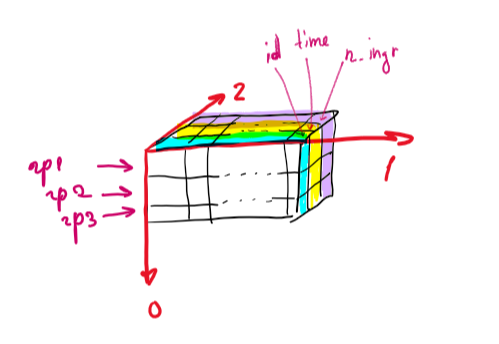